#📌 Multiple Linear Regression  

📍 **The Regression Formula:**  
# $\hat{y} = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n$

# **Where:**  
✔️ **ŷ (Predicted Value)** → The estimated outcome (e.g., profit 💰)  
✔️ **X₁, X₂, ..., Xₙ (Independent Variables)** → Input features affecting the outcome 📊  
✔️ **b₀ (Intercept)** → The starting value when all **X** = 0 (base profit) 🏁  
✔️ **b₁, b₂, ..., bₙ (Coefficients)** → The rate at which **ŷ** changes for each unit of **X** 📈  

---
**💡 Key Insight:**  
- The **intercept (b₀)** represents the base profit when all input variables are zero.  
- Each **slope coefficient (b₁, b₂, ..., bₙ)** shows how much the profit changes per unit change of a specific feature.  
- If **b₁, b₂, ..., bₙ** are positive, there is a **positive correlation** (increase in input leads to an increase in profit).  
- If **b₁, b₂, ..., bₙ** are negative, there is a **negative correlation** (increase in input leads to a decrease in profit).  

🚀 Let’s go! 🔥

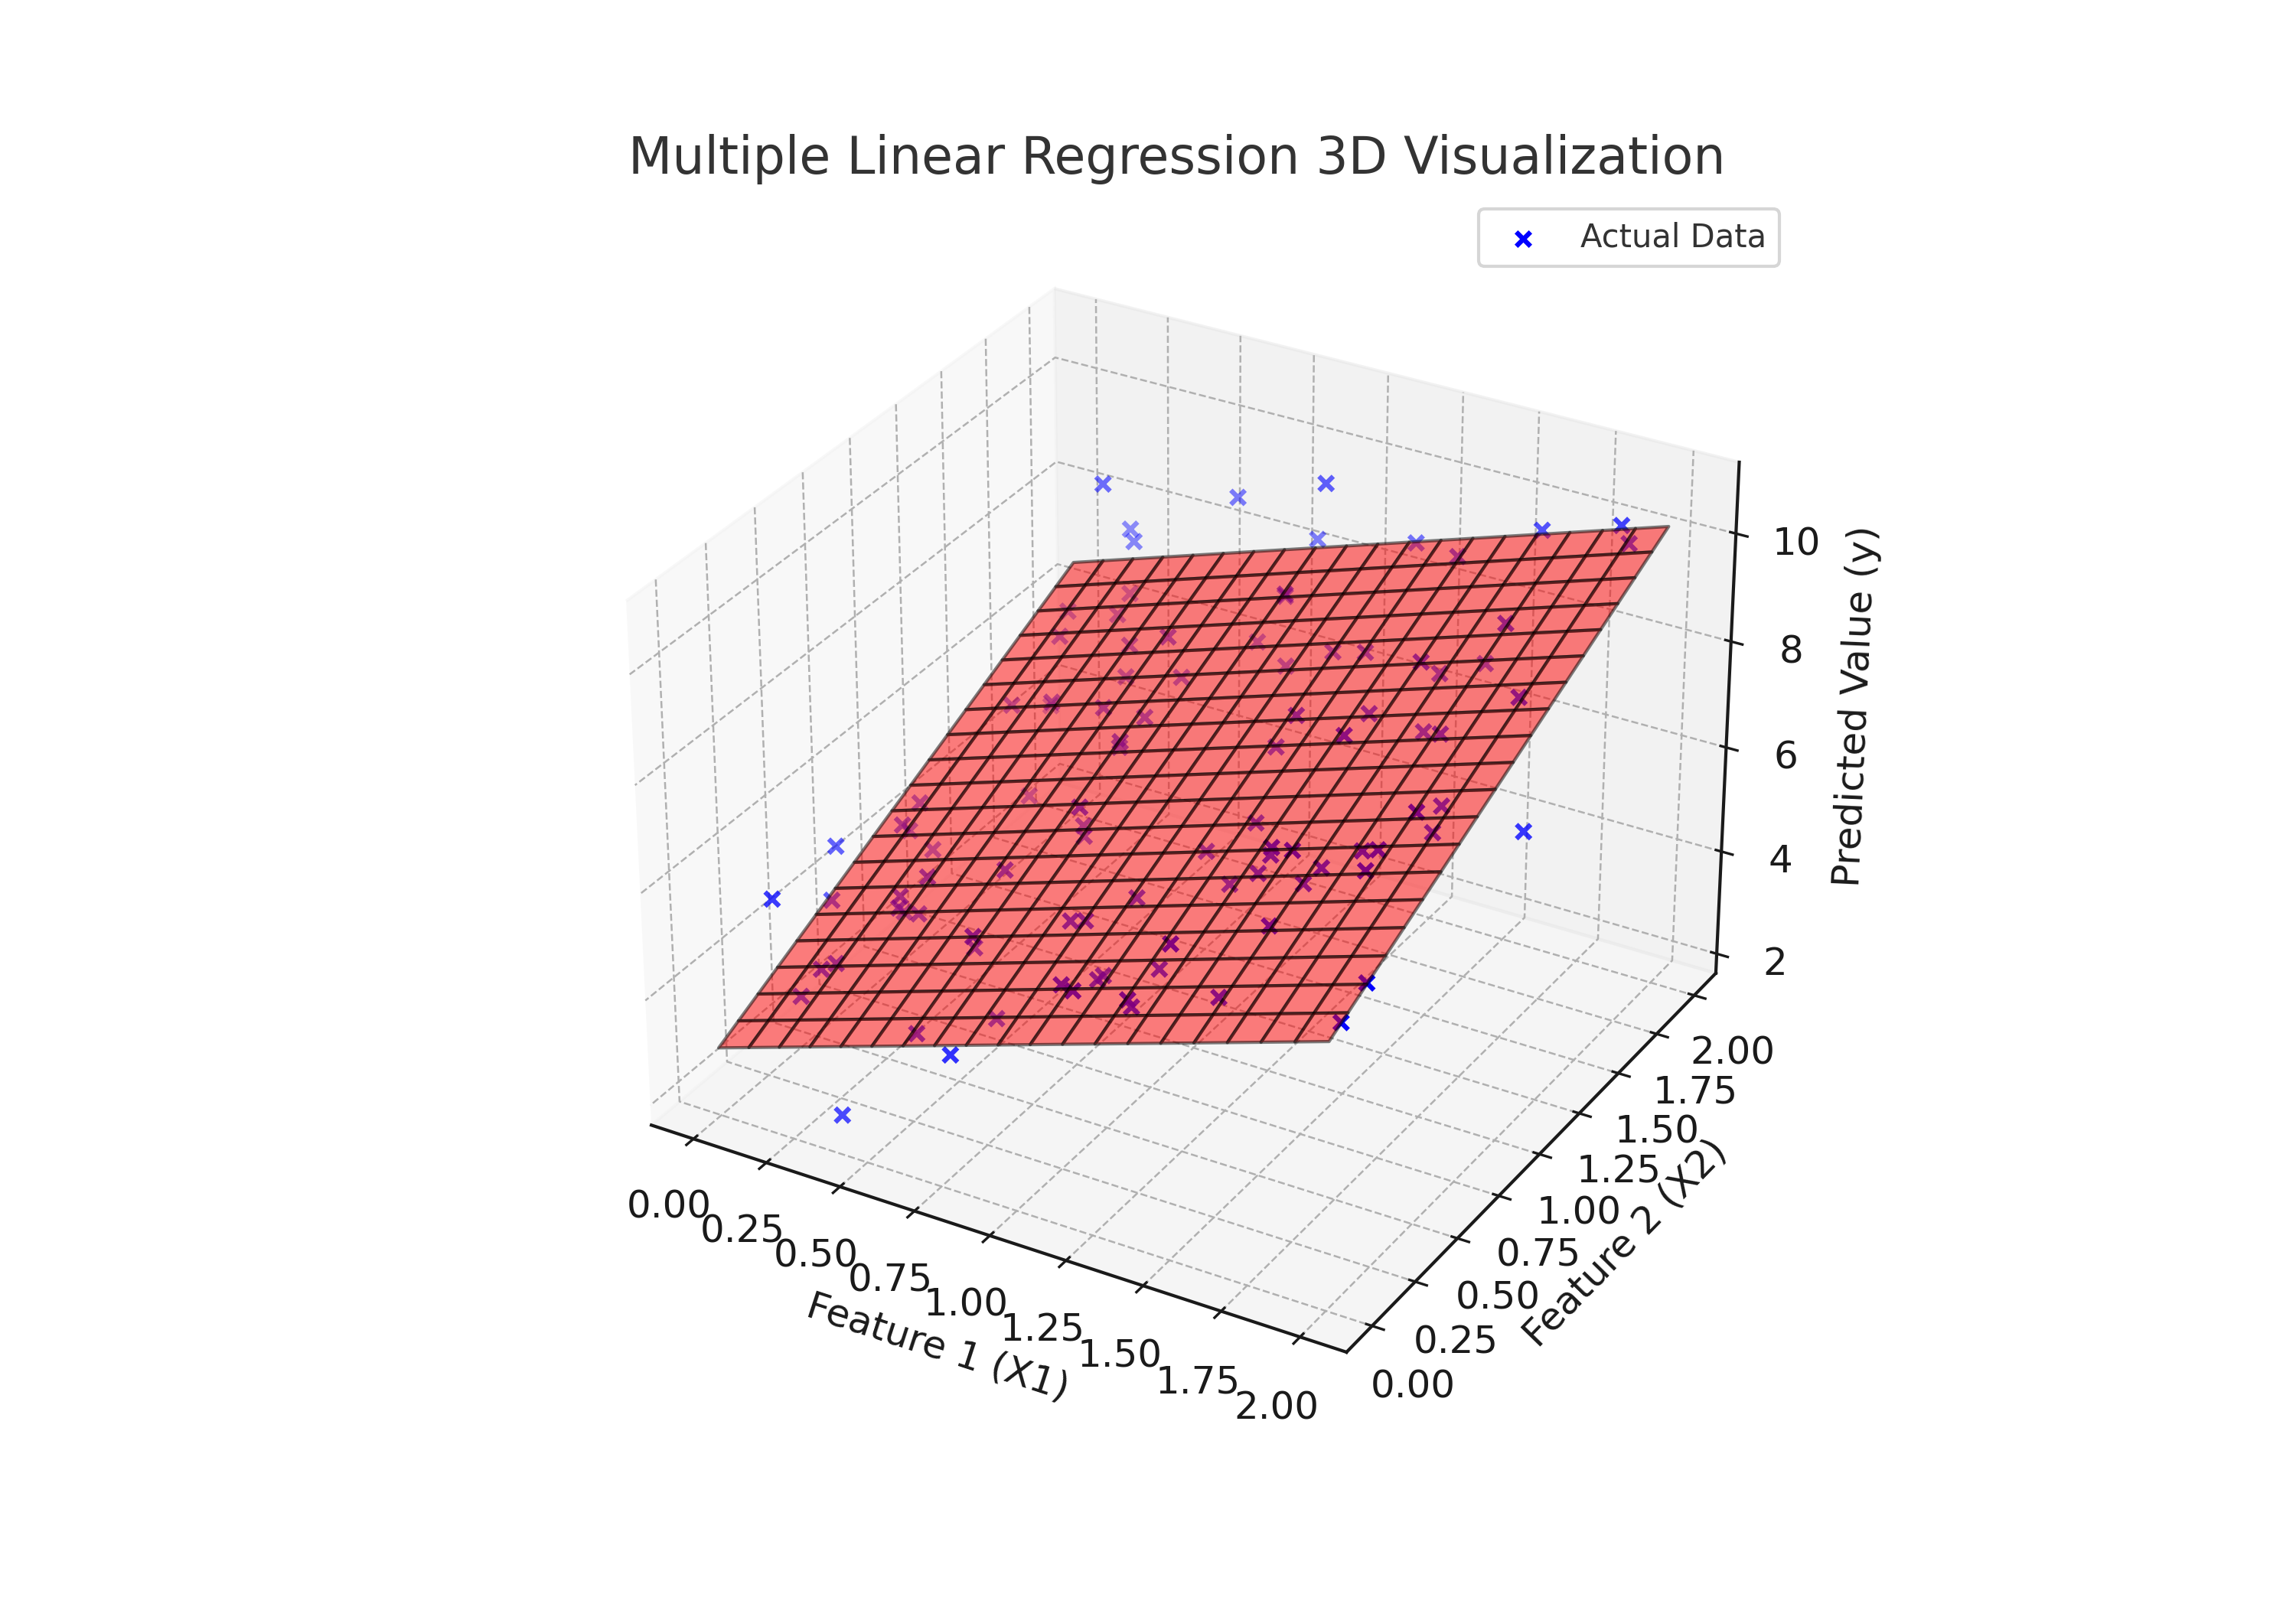

#📌Importing the libraries

In [ ]:
# ------------------------------------------------------------------------------
# 📌 1. Import Required Libraries
# ------------------------------------------------------------------------------
import numpy as np  # 🧮 NumPy for numerical computations
import matplotlib.pyplot as plt  # 📊 Matplotlib for data visualization
import pandas as pd  # 📑 Pandas for handling tabular data
from sklearn.model_selection import train_test_split  # ✂️ Splitting data into training/testing sets
from sklearn.linear_model import LinearRegression  # 🤖 Linear Regression Model
from sklearn.preprocessing import OneHotEncoder  # 🔄 Handling categorical data
from sklearn.compose import ColumnTransformer  # 🏗 Efficiently transform specific columns
from sklearn.metrics import mean_absolute_error, r2_score  # 📏 Performance evaluation metrics

#📌 Importing the dataset

In [ ]:
# 📌 2. Load the Dataset
# ------------------------------------------------------------------------------
# 📄 The dataset contains startup investment details (R&D Spend, Marketing Spend, etc.)
# 🎯 Our goal: Predict the **Profit** based on other factors

dataset = pd.read_csv('50_Startups.csv')  # Load dataset
X = dataset.iloc[:, :-1].values  # Independent variables (all columns except the last)
y = dataset.iloc[:, -1].values  # Dependent variable (Profit)

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

#📌 Encoding categorical data

In [ ]:
# 📌 3. Handling Categorical Data (State)
# ------------------------------------------------------------------------------
# 🚀 The "State" column is categorical, and ML models require numerical input
# 🏗 We apply One-Hot Encoding to convert categorical values into numerical ones

column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],  # Encode 4th column (State)
    remainder='passthrough'  # Keep other columns unchanged
)
X = np.array(column_transformer.fit_transform(X))  # Transform the dataset

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

#📌 Splitting the dataset into the Training set and Test set

In [ ]:
# 📌 4. Splitting the Data into Training & Test Sets
# ------------------------------------------------------------------------------
# ✅ 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#📌 Training the Multiple Linear Regression model on the Training set

In [ ]:
regressor = LinearRegression()  # Initialize the model
regressor.fit(X_train, y_train)  # Train (fit) the model

LinearRegression()

#📌 Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)  # Predicting profit

# 📊 Printing results
for actual, predicted in zip(y_test, y_pred):
    print(f'🔹 Actual: ${actual:,.2f} | 🎯 Predicted: ${predicted:,.2f}')

🔹 Actual: $103,282.38 | 🎯 Predicted: $103,015.20
🔹 Actual: $144,259.40 | 🎯 Predicted: $132,582.28
🔹 Actual: $146,121.95 | 🎯 Predicted: $132,447.74
🔹 Actual: $77,798.83 | 🎯 Predicted: $71,976.10
🔹 Actual: $191,050.39 | 🎯 Predicted: $178,537.48
🔹 Actual: $105,008.31 | 🎯 Predicted: $116,161.24
🔹 Actual: $81,229.06 | 🎯 Predicted: $67,851.69
🔹 Actual: $97,483.56 | 🎯 Predicted: $98,791.73
🔹 Actual: $110,352.25 | 🎯 Predicted: $113,969.44
🔹 Actual: $166,187.94 | 🎯 Predicted: $167,921.07


#  📌 Model Evaluation

In [ ]:
# 📌 Model Evaluation - Extended Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 🏆 1. Mean Absolute Error (MAE)
# -----------------------------------------------------
# MAE calculates the average of the absolute differences between actual and predicted values.
# It gives an idea of how much, on average, the predictions deviate from the real values.
# ✅ Lower MAE = Better model performance (smaller average error).
mae = mean_absolute_error(y_test, y_pred)

# 📏 2. Mean Squared Error (MSE)
# -----------------------------------------------------
# MSE calculates the average of the squared differences between actual and predicted values.
# Squaring the errors penalizes larger mistakes more than smaller ones.
# ✅ Lower MSE = Better model performance.
# ❗ MSE is sensitive to outliers because squared errors can grow significantly.
mse = mean_squared_error(y_test, y_pred)

# 📐 3. Root Mean Squared Error (RMSE)
# -----------------------------------------------------
# RMSE is simply the square root of MSE.
# It is useful because it brings the error back to the original scale of the data,
# making it easier to interpret compared to MSE.
# ✅ Lower RMSE = Better model performance.
# 🚀 RMSE is often preferred over MSE for real-world applications.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 📈 4. R² Score (Coefficient of Determination)
# -----------------------------------------------------
# R² Score explains how well the independent variables predict the dependent variable.
# ✅ R² ranges from 0 to 1:
#    - R² = 1 → Perfect fit (model explains 100% of variance)
#    - R² = 0 → Model does not explain variance at all
#    - R² < 0 → Model is worse than just predicting the mean value
r2 = r2_score(y_test, y_pred)

# 🖨 Printing Results
print(f'📊 Mean Absolute Error (MAE): {mae:.2f} → Average absolute deviation from real values')
print(f'📏 Mean Squared Error (MSE): {mse:.2f} → Penalizes larger errors more heavily')
print(f'📐 Root Mean Squared Error (RMSE): {rmse:.2f} → Similar to MSE but in original scale')
print(f'📈 R² Score: {r2:.4f} (closer to 1 = better fit) → How well the model explains variance')



📊 Mean Absolute Error (MAE): 7514.29 → Average absolute deviation from real values
📏 Mean Squared Error (MSE): 83502864.03 → Penalizes larger errors more heavily
📐 Root Mean Squared Error (RMSE): 9137.99 → Similar to MSE but in original scale
📈 R² Score: 0.9347 (closer to 1 = better fit) → How well the model explains variance


# 📌  The Regression Formula

In [ ]:
# 📌  The Regression Formula
# ------------------------------------------------------------------------------
# 📍 **The Regression Formula:**
#    ŷ = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ
#
# **Where:**
# ✔️ **ŷ (Predicted Value)** → The estimated outcome (profit) 💰
# ✔️ **X₁, X₂, ... Xₙ (Independent Variables)** → Input features 📊
# ✔️ **b₀ (Intercept)** → The starting value when all X = 0 🏁
# ✔️ **b₁, b₂, ..., bₙ (Coefficients)** → The impact of each feature on the outcome 📈

b0 = regressor.intercept_  # Intercept (b₀)
b_coefficients = regressor.coef_  # Coefficients (b₁, b₂, ...)

print(f'📌 🔥 Intercept (b₀): {b0:.2f}')
print(f'📌 🔥 Coefficients (b₁, b₂, ...): {b_coefficients}')


📌 🔥 Intercept (b₀): 42467.53
📌 🔥 Coefficients (b₁, b₂, ...): [ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]


#  📌  Algorithm Explanation

In [ ]:
# 📌 9. Algorithm Explanation
# ------------------------------------------------------------------------------
# 📚 **Multiple Linear Regression Algorithm Steps:**
# 1️⃣ **Data Preprocessing** → Handling missing values, encoding categorical data.
# 2️⃣ **Feature Selection** → Choosing relevant variables to improve model accuracy.
# 3️⃣ **Splitting Data** → Train-test split (80/20 rule).
# 4️⃣ **Training the Model** → Applying the regression formula.
# 5️⃣ **Making Predictions** → Using trained model to predict test data.
# 6️⃣ **Evaluating the Model** → Using metrics like MAE & R² Score.

# ✅ **Formula Explanation:**
# The model tries to **minimize the error** by optimizing the coefficients **b₀, b₁, ..., bₙ**.
# Uses **Ordinary Least Squares (OLS)** method to fit the best line.


# 📌📌  Advanced Concept: Feature Scaling (Normalization)


In [ ]:
# 📌 10. Advanced Concept: Feature Scaling (Normalization)
# ------------------------------------------------------------------------------
# 🛠 Some ML models work better with normalized data. We can apply Feature Scaling
# to ensure that all numerical values have a similar range.

from sklearn.preprocessing import StandardScaler  # 📏 Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the dataset

# Now, X_scaled can be used for training another model if needed.

# ------------------------------------------------------------------------------
# 📌 11. Conclusion
# ------------------------------------------------------------------------------
# ✅ We successfully built a **Multiple Linear Regression Model** 🚀
# ✅ We handled **categorical data** using One-Hot Encoding
# ✅ We **split the dataset** into training & testing sets
# ✅ We **trained & evaluated** the model with MAE & R² Score
# ✅ We explored **advanced techniques** like **Feature Scaling**

print("🎉 Regression Model Completed Successfully! 🎉")


🎉 Regression Model Completed Successfully! 🎉


#📌📌 📌 Validation: Effect of Feature Scaling on Model Performance

In [ ]:
# 🔄 📌 Step 10 Validation: Effect of Feature Scaling on Model Performance
# -----------------------------------------------------------------------------
# Now, we will train the model **before and after** scaling and compare the performance.
# The goal is to check if Feature Scaling improves the model's accuracy.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 📌 1️⃣ Splitting the dataset AFTER scaling
# -----------------------------------------------------------------------------
# ✅ We use the scaled dataset (X_scaled) to create training & test sets.
# ✅ The target variable (y) remains unchanged.
# ✅ The test size is 20% of the dataset (80% training, 20% testing).

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 🚀 2️⃣ Training the Model on Scaled Data
# -----------------------------------------------------------------------------
# ✅ We create a new instance of the Linear Regression model.
# ✅ This model will now be trained on the scaled dataset.
# ✅ The model learns the relationship between the **normalized features** and **target variable (y).**

regressor_scaled = LinearRegression()  # 🔹 Initializing the Linear Regression model
regressor_scaled.fit(X_train_scaled, y_train)  # 🔹 Training the model on the scaled dataset

# 🎯 3️⃣ Making Predictions on Test Set
# -----------------------------------------------------------------------------
# ✅ We use the trained model to predict values for the test set (X_test_scaled).
# ✅ This will help us measure how well the model performs on unseen data.

y_pred_scaled = regressor_scaled.predict(X_test_scaled)  # 🔹 Predicting the test set results

# 📊 4️⃣ Evaluating the Model - Comparing R² Scores
# -----------------------------------------------------------------------------
# ✅ R² Score measures how well the model explains the variance in the data.
# ✅ Higher R² Score (closer to 1) means a better fit.
# ✅ We compare:
#    - **r2 (Without Scaling)** → Performance of the model on raw data.
#    - **r2_scaled (With Scaling)** → Performance after Feature Scaling.

r2_scaled = r2_score(y_test, y_pred_scaled)

# 📌 5️⃣ Printing and Comparing Results
# -----------------------------------------------------------------------------
# ✅ Display R² Score **before and after** Feature Scaling.
# ✅ If scaling improves the score, it means normalization was beneficial!

print("📊 **Model Performance Comparison:**")
print(f"🎯 **R² Score WITHOUT Scaling:** {r2:.4f} ❌ (Original Data)")
print(f"🚀 **R² Score WITH Scaling:** {r2_scaled:.4f} ✅ (Normalized Data)")

# 🔍 6️⃣ Final Conclusion
# -----------------------------------------------------------------------------
# ✅ If **R² Score increased**, then **Feature Scaling improved the model** ✅.
# ✅ If **R² Score remained the same**, then Scaling **had no significant effect** 🤔.
# ✅ If **R² Score decreased**, then Scaling **negatively impacted the model** ⚠️.

# 🔥 **Final Verdict:** If Scaling improved performance, it's recommended for this dataset! 🚀

📊 **Model Performance Comparison:**
🎯 **R² Score WITHOUT Scaling:** 0.9347 ❌ (Original Data)
🚀 **R² Score WITH Scaling:** 0.9347 ✅ (Normalized Data)


# 📌📌 📌 WIZ

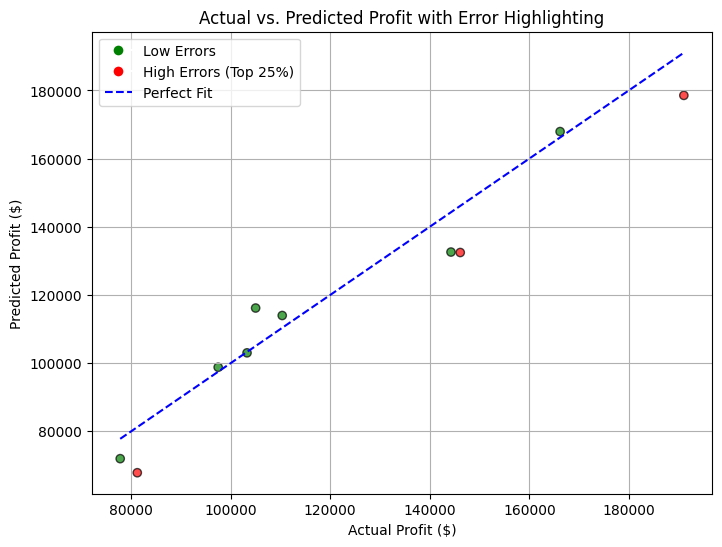

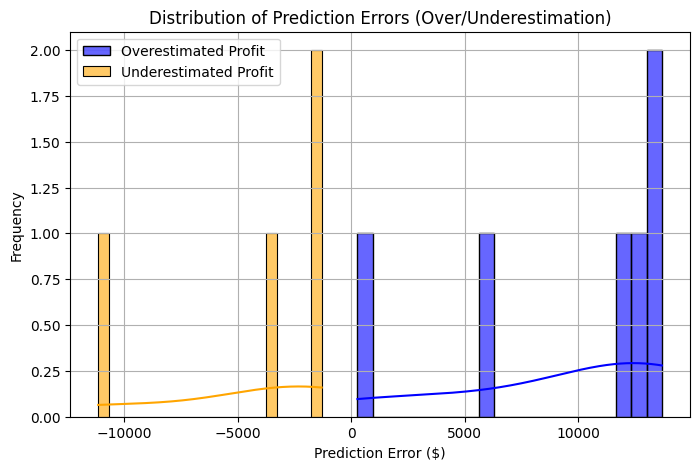

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# 📌 Enhanced Scatter plot: Actual vs. Predicted Profit with Error Highlighting
plt.figure(figsize=(8, 6))

# Compute absolute error and define threshold for high errors (top 25%)
error_magnitude = np.abs(y_test - y_pred)
threshold = np.percentile(error_magnitude, 75)
colors = np.where(error_magnitude > threshold, "red", "green")

# Scatter plot with dynamic colors
plt.scatter(y_test, y_pred, c=colors, alpha=0.7, edgecolors="k")

# Adding a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Low Errors', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='High Errors (Top 25%)', markerfacecolor='red', markersize=8),
    Line2D([0], [0], linestyle="dashed", color="blue", label="Perfect Fit")
]

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="dashed")
plt.xlabel("Actual Profit ($)")
plt.ylabel("Predicted Profit ($)")
plt.title("Actual vs. Predicted Profit with Error Highlighting")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

# 📌 Improved Error Distribution Plot
plt.figure(figsize=(8, 5))

# Splitting errors into positive and negative for better visualization
sns.histplot(errors[errors > 0], bins=20, kde=True, color='blue', alpha=0.6, label="Overestimated Profit")
sns.histplot(errors[errors < 0], bins=20, kde=True, color='orange', alpha=0.6, label="Underestimated Profit")

plt.xlabel("Prediction Error ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Over/Underestimation)")
plt.legend()
plt.grid(True)
plt.show()